# Sales Analysis

#### Import necessary libraries and set the working directory

In [1]:
import pandas as pd

import os

import glob

import matplotlib.pyplot as plt

import calendar

from itertools import combinations

from collections import Counter

os.chdir('/content/drive/MyDrive/Colab Notebooks/SalesAnalysis/Sales_Data')

#### Use glob to match the pattern 'csv'

In [2]:
extension = 'csv'

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#### Combine all files in the list and export as CSV

In [3]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

all_months_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/SalesAnalysis/Sales_Data/combined_csv.csv')

#### Read in updated dataframe

In [4]:
all_months_data

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Clean up the data!

##### Drop rows of NAN

In [5]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]

nan_df.head()

all_months_data = all_months_data.dropna(how = 'all')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


##### Find 'Or' and delete it

In [6]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2]!= 'Or']

all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Feature engineering - augment data with additional columns

##### Add Month Column

In [7]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

all_months_data['Month'] = all_months_data['Month'].astype('int32')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


##### Convert columns to the correct type

```
# This is formatted as code
```



In [8]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) # Make int

all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])# Make float

#### Add a sales colum

In [9]:
all_months_data['Sales'] = all_months_data['Quantity Ordered']* all_months_data['Price Each']

all_months_data.insert(4, 'Sales', all_months_data.pop('Sales'))

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


##### Add a city column

In [10]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


##### Convert Order Date to datetime()

In [11]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

##### Create new hour and minute columns

In [12]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

all_months_data['Minute'] = all_months_data['Order Date'].dt.minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59


## Questions:

### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
results = all_months_data.groupby('Month').sum()

results

<ipython-input-13-cdcacb43f959>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_months_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,32709,5435305.14,5466770.19,418455,847320
2,40347,6566654.16,6606067.26,518007,1064655
3,51015,8373623.49,8421301.14,656907,1342677
4,61674,10103013.06,10172010.72,786777,1632558
5,56001,9405375.39,9457820.25,716340,1463697
6,45759,7686076.83,7733406.78,586584,1207308
7,48216,7897618.68,7943327.28,618507,1252047
8,40344,6691036.26,6733403.64,516867,1061571
9,39327,6254976.27,6292680.39,505539,1025094


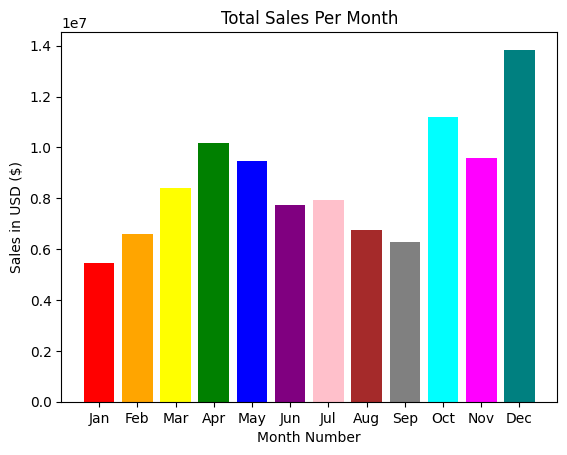

In [14]:
months = range(1,13)

# Define a list of colors for each bar

bar_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'teal']

# Plotting the bar chart

plt.bar(months, results['Sales'],color=bar_colors,tick_label=[calendar.month_abbr[i] for i in range(1, 13)])

# Adding labels and title

plt.xlabel('Month Number')

plt.ylabel('Sales in USD ($)')

plt.title('Total Sales Per Month')

# Display the chart

plt.show()

### Question 2: What city sold the most product?[link text](https://)

In [15]:
results = all_months_data.groupby('City').sum()

results

<ipython-input-15-d387836c8133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_months_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales,Month,Hour,Minute
City,,,,,,
Atlanta (GA),49806,8339724.60,8386495.74,314382,642792,1328796
Austin (TX),33459,5429620.83,5458745.25,209487,425838,867180
Boston (MA),67584,10912229.31,10984926.03,423336,864675,1771326
Dallas (TX),50190,8257883.46,8303926.20,313860,643170,1305465
Los Angeles (CA),99867,16264305.69,16357712.40,624975,1282332,2599914
New York City (NY),83796,13906112.49,13992952.29,527223,1073088,2200794
Portland (ME),8250,1341567.75,1349274.81,51432,105633,218568
Portland (OR),33909,5581674.66,5612197.02,211863,433263,886599
San Francisco (CA),150717,24634385.22,24786611.73,946560,1929795,3958431


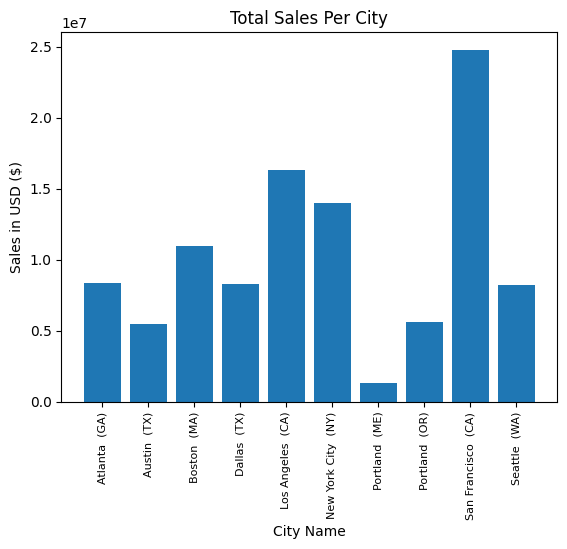

In [16]:
cities = [city for city, df in all_months_data.groupby('City')]

# Define a list of colors for each bar

# Plotting the bar chart

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8)

# Adding labels and title

plt.xlabel('City Name')

plt.ylabel('Sales in USD ($)')

plt.title('Total Sales Per City')

# Display the chart

plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

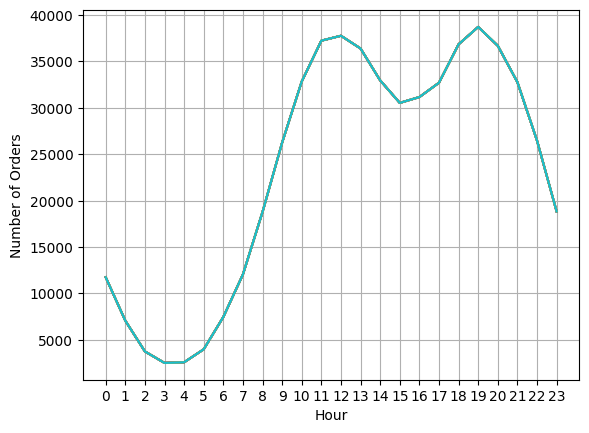

In [17]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]

plt.plot(hours, all_months_data.groupby(['Hour']).count())

plt.xticks(hours)

plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()

plt.show()

#### Question 4: What products are most often sold together?


In [18]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
0,141234,"iPhone,iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Ca..."
2,141236,"Wired Headphones,Wired Headphones,Wired Headph..."
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,141238,"Wired Headphones,Wired Headphones,Wired Headph..."


In [19]:
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 66141
('Lightning Charging Cable', 'Lightning Charging Cable') 65460
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 62355
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 62046
('Wired Headphones', 'Wired Headphones') 56961
('Apple Airpods Headphones', 'Apple Airpods Headphones') 46863
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 40218
('27in FHD Monitor', '27in FHD Monitor') 22602
('iPhone', 'iPhone') 20544
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 18735


#### Question 5: What products sold the most?

<ipython-input-20-c107d8ae9b97>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


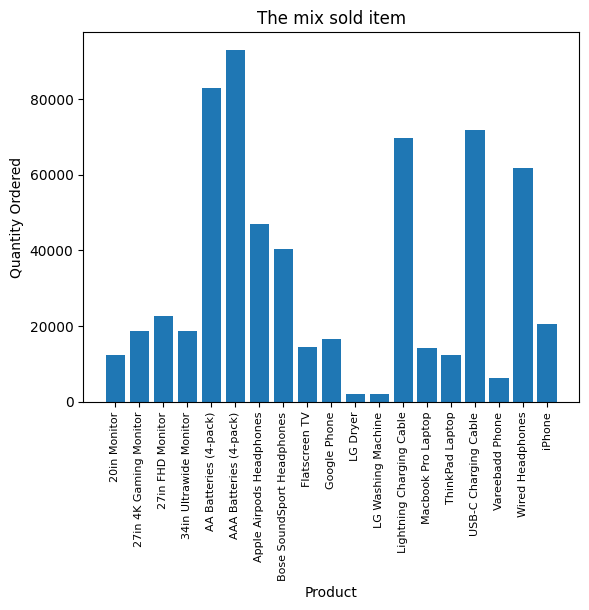

In [20]:
product_group = all_months_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.title("The mix sold item")

plt.xlabel('Product')

plt.ylabel('Quantity Ordered')

plt.xticks(products, rotation = 'vertical', size = 8)

plt.show()

<ipython-input-21-7e6c161ba9f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_months_data.groupby('Product').mean()['Price Each']
<ipython-input-21-7e6c161ba9f2>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


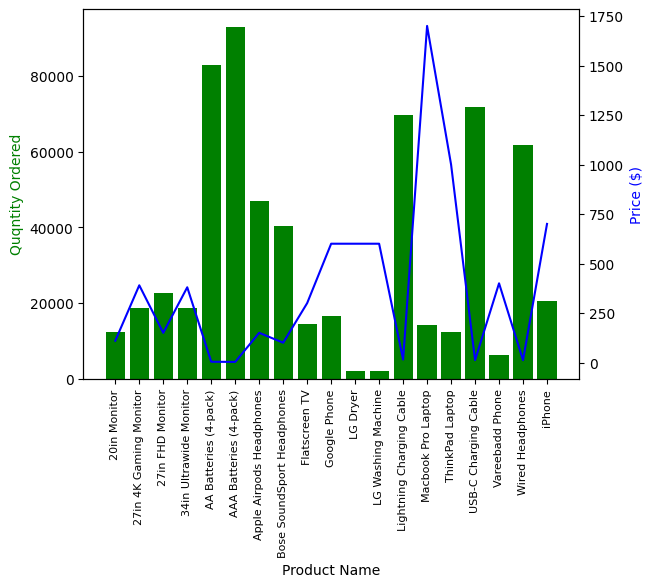

In [21]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color = 'green')

ax2.plot(products, prices, '-b')

ax1.set_xlabel('Product Name')

ax1.set_ylabel('Quqntity Ordered', color = 'g')

ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()